# Homework 10 - Assignment 2 - Spatial Data Analysis
Exploratory spatial data analysis summer / winter comparison of CitiBike data using pysal and geopandas

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [119]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Import initial libraries

In [120]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import random
random.seed(123)

## Working with Shape File

### Loading Census Tract Shape File¶

In [121]:
from geopandas import GeoDataFrame
shape_path="CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

### Coordinate systems, projections, and transformations 

In [122]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

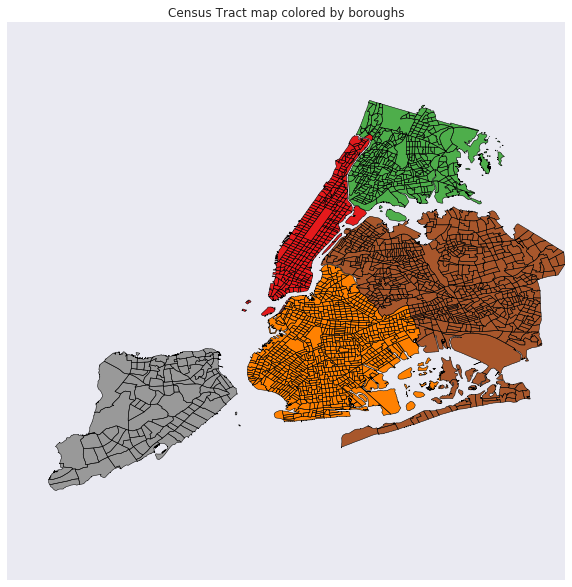

In [123]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [124]:
ct_data=DataFrame.from_csv('ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)

#### Add popuation density to CT shapefile

In [125]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

#### Vusualize the Population density for 2010

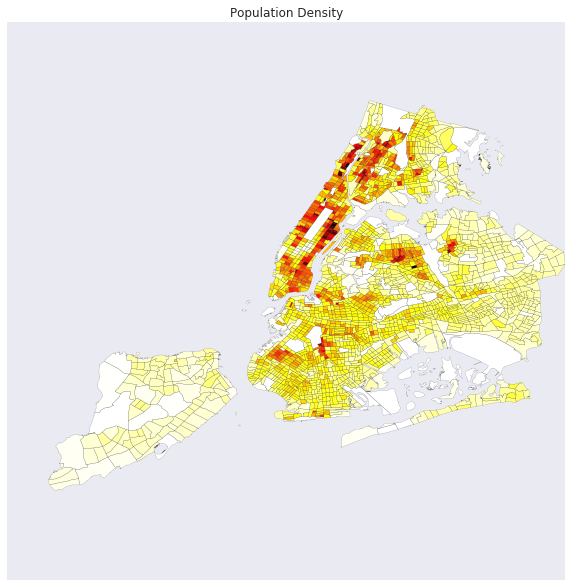

In [126]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [127]:
df_bike_monthly=DataFrame.from_csv('CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

1000  1001   1002  1003  1004  1005  1006  1007  1008  1009  ...   \
starttime                                                                ...    
2013-07-31  2343  3914   6979  2750  4914  2229  2183  3139  3622  2368  ...    
2013-08-31  2696  4429   9020  3433  6645  2768  2761  3422  4271  2910  ...    
2013-09-30  2878  5258   9814  3739  7837  3206  2747  3590  4618  2885  ...    
2013-10-31  2920  4409  10456  3520  8928  3237  2530  3909  4169  2542  ...    
2013-11-30  1883  2731   6384  2446  5201  2085  1415  2727  3146  1539  ...    

            1533  1534  1535  1536  1537  1538  1539  1540  1541  1542  
starttime                                                               
2013-07-31     0     0     0     0     0     0     0     0     0     0  
2013-08-31     0     0     0     0     0     0     0     0     0     0  
2013-09-30     0     0     0     0     0     0     0     0     0     0  
2013-10-31     0     0     0     0     0     0     0     0     0     0  
2013-11-30     0     0     0     0     0     0     0     0     0     0  

[5 rows x 543 columns]

In [128]:
df_bike_monthly.index

DatetimeIndex(['2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30'],
              dtype='datetime64[ns]', name=u'starttime', freq=None)

In [129]:
df_bike_monthly.index.month

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6], dtype=int32)

In [130]:
df_bike_monthly['summer'] = [1 if (i.month >= 6 and i.month <= 9) else 0 for i in df_bike_monthly.index]
df_bike_monthly['winter'] = [1 if (i.month >= 1 and i.month <= 3) | (i.month==12) else 0 for i in df_bike_monthly.index]
df_bike_monthly_summer = df_bike_monthly[(df_bike_monthly.summer==1)]
df_bike_monthly_winter = df_bike_monthly[(df_bike_monthly.winter==1)]
df_bike_monthly_summer.head(12)

1000  1001   1002  1003  1004  1005  1006  1007  1008  1009  \
starttime                                                                 
2013-07-31  2343  3914   6979  2750  4914  2229  2183  3139  3622  2368   
2013-08-31  2696  4429   9020  3433  6645  2768  2761  3422  4271  2910   
2013-09-30  2878  5258   9814  3739  7837  3206  2747  3590  4618  2885   
2014-06-30  2048  3306   9626  3515  7255  2942  1917  3702  3694  2422   
2014-07-31  2252  3216   9825  3509  7014  3224  2195  3732  4042  2268   
2014-08-31  2179  3004  10196  3573  7328  3311  2213  4078  4011  2168   
2014-09-30  2281  3678  10357  3680  7740  3695  2217  4112  3504  2315   
2015-06-30  2309     0   9457  3426  5859  4763  1809  5190  2695  2116   
2015-07-31  2556  3831  10341  3958  6424  5397  2185  5688  4846  2743   
2015-08-31  2640  3799  11801  4288  7031  5417  2470  6306  4583  2838   
2015-09-30  3115  4161  11291  4357  7282  6293  2648  6477  5061  2993   
2016-06-30  3399  7370  10130  4566  7420  5775  2429  6037     0  3054   

             ...    1535  1536  1537  1538  1539  1540  1541  1542  summer  \
starttime    ...                                                             
2013-07-31   ...       0     0     0     0     0     0     0     0       1   
2013-08-31   ...       0     0     0     0     0     0     0     0       1   
2013-09-30   ...       0     0     0     0     0     0     0     0       1   
2014-06-30   ...       0     0     0     0     0     0     0     0       1   
2014-07-31   ...       0     0     0     0     0     0     0     0       1   
2014-08-31   ...       0     0     0     0     0     0     0     0       1   
2014-09-30   ...       0     0     0     0     0     0     0     0       1   
2015-06-30   ...       0     0     0     0     0     0     0     0       1   
2015-07-31   ...       0     0     0     0     0     0     0     0       1   
2015-08-31   ...       0     0     0     0     0     0     0     0       1   
2015-09-30   ...       0     0     0     0     0     0     0     0       1   
2016-06-30   ...       0  7009  1109   665  2470   178   852   615       1   

            winter  
starttime           
2013-07-31       0  
2013-08-31       0  
2013-09-30       0  
2014-06-30       0  
2014-07-31       0  
2014-08-31       0  
2014-09-30       0  
2015-06-30       0  
2015-07-31       0  
2015-08-31       0  
2015-09-30       0  
2016-06-30       0  

[12 rows x 545 columns]

In [131]:
df_bike_monthly_winter.head()

1000  1001  1002  1003  1004  1005  1006  1007  1008  1009  \
starttime                                                                
2013-12-31  1299  1650  4081  1686  3046  1575   830  1890  2048  1009   
2014-01-31   956  1337  3178  1251  1920  1130   477  1412  1082   681   
2014-02-28   650   960  2920   676  1808   933   508  1045   963   530   
2014-03-31   804  1559  5102  1441  2643  1477   849  2004  2105   880   
2014-12-31  1052  1304  4501  1783  2985  2091   779  2108  1636   878   

             ...    1535  1536  1537  1538  1539  1540  1541  1542  summer  \
starttime    ...                                                             
2013-12-31   ...       0     0     0     0     0     0     0     0       0   
2014-01-31   ...       0     0     0     0     0     0     0     0       0   
2014-02-28   ...       0     0     0     0     0     0     0     0       0   
2014-03-31   ...       0     0     0     0     0     0     0     0       0   
2014-12-31   ...       0     0     0     0     0     0     0     0       0   

            winter  
starttime           
2013-12-31       1  
2014-01-31       1  
2014-02-28       1  
2014-03-31       1  
2014-12-31       1  

[5 rows x 545 columns]

### Time Series Aanalysis

/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

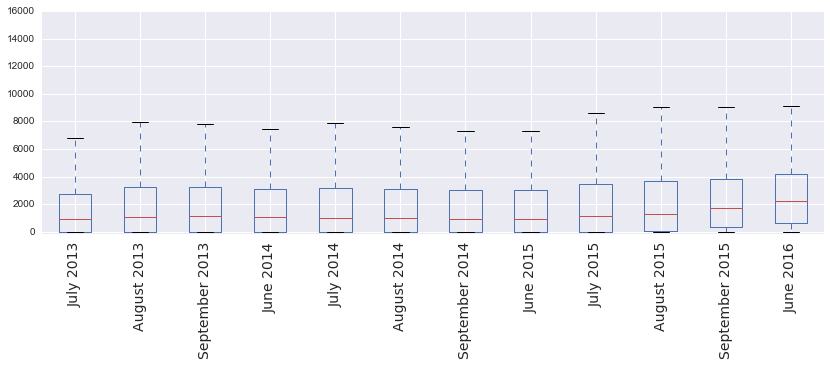

In [132]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=df_bike_monthly_summer.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

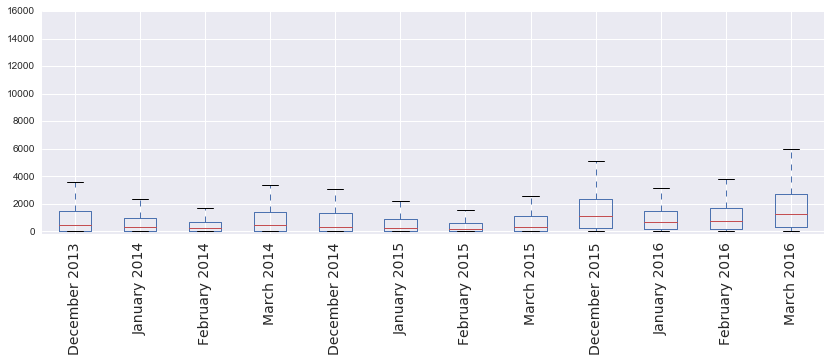

In [133]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=df_bike_monthly_winter.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])

#### Seasonal Decomposition

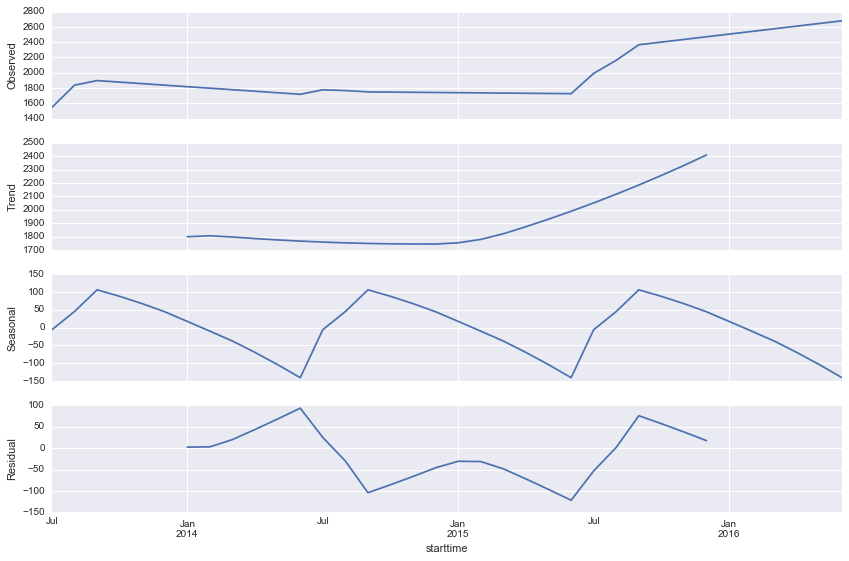

In [134]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly_summer.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

## Map CitiBike Data to CT level

### Load CitiBike station location data

In [135]:
station_id=DataFrame.from_csv('Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

lat        lon
1000  40.753231 -73.970325
1001  40.749718 -74.002950
1002  40.730287 -73.990765
1003  40.718939 -73.992663
1004  40.734927 -73.992005

### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [136]:
import shapely
# combine lat and lon to one column
station_id['lonlat']=zip(station_id.lon,station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

lat        lon                         lonlat  \
1000  40.753231 -73.970325    (-73.97032517, 40.75323098)   
1001  40.749718 -74.002950  (-74.002950346, 40.749717753)   
1002  40.730287 -73.990765     (-73.9907647, 40.73028666)   
1003  40.718939 -73.992663    (-73.99266288, 40.71893904)   
1004  40.734927 -73.992005    (-73.99200509, 40.73492695)   

                                     geometry  
1000         POINT (-73.97032517 40.75323098)  
1001  POINT (-74.00295034600001 40.749717753)  
1002          POINT (-73.9907647 40.73028666)  
1003         POINT (-73.99266288 40.71893904)  
1004   POINT (-73.99200509000001 40.73492695)

### Intersect the two geometries

In [137]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [138]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add SUMMER Monthly rides to the station GeoDataFrame with CT code

In [139]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['MonthlyAve_summer']=df_bike_monthly_summer.sum()

### Add WINTER Monthly rides to the station GeoDataFrame with CT code

In [140]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['MonthlyAve_winter']=df_bike_monthly_winter.sum()

In [141]:
station_id.head()

lat        lon                         lonlat  \
1000  40.753231 -73.970325    (-73.97032517, 40.75323098)   
1001  40.749718 -74.002950  (-74.002950346, 40.749717753)   
1002  40.730287 -73.990765     (-73.9907647, 40.73028666)   
1003  40.718939 -73.992663    (-73.99266288, 40.71893904)   
1004  40.734927 -73.992005    (-73.99200509, 40.73492695)   

                                     geometry BoroCT2010  MonthlyAve_summer  \
1000         POINT (-73.97032517 40.75323098)    1009000              30696   
1001  POINT (-74.00295034600001 40.749717753)    1009900              45966   
1002          POINT (-73.9907647 40.73028666)    1005700             118837   
1003         POINT (-73.99266288 40.71893904)    1001800              44794   
1004   POINT (-73.99200509000001 40.73492695)    1006100              82749   

      MonthlyAve_winter  
1000              13163  
1001              16113  
1002              52940  
1003              19541  
1004              31319

### Add the monthly average rides to the CT shapefile 

In [142]:
# use the 
temp=station_id[['MonthlyAve_summer', 'MonthlyAve_winter']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)

/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


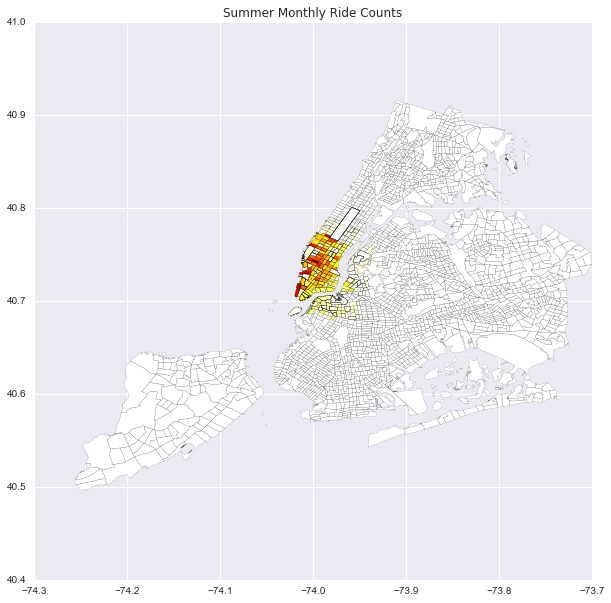

In [143]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve.plot(column='MonthlyAve_summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Summer Monthly Ride Counts")

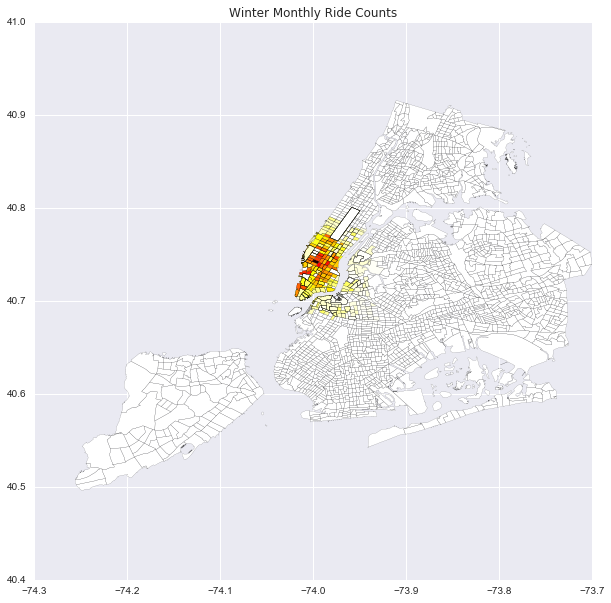

In [144]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve.plot(column='MonthlyAve_winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Winter Monthly Ride Counts")

### Removing the CTs that are out of zoom boundries

In [145]:
ct_shape_MonthlyAve_Zoom=(ct_shape_MonthlyAve[ct_shape_MonthlyAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [146]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs (summer):", len(temp.MonthlyAve_summer)
print "Number of zoomed CTs (winter):", len(temp.MonthlyAve_winter)


Total number of CTs: 2166
Number of zoomed CTs (summer): 543
Number of zoomed CTs (winter): 543


### Map the monthly rides in Summer

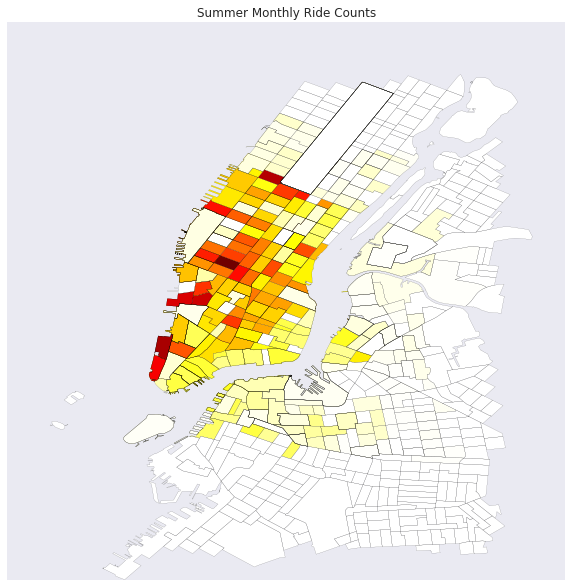

In [147]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='MonthlyAve_summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Summer Monthly Ride Counts")

### Map the monthly rides in Winter

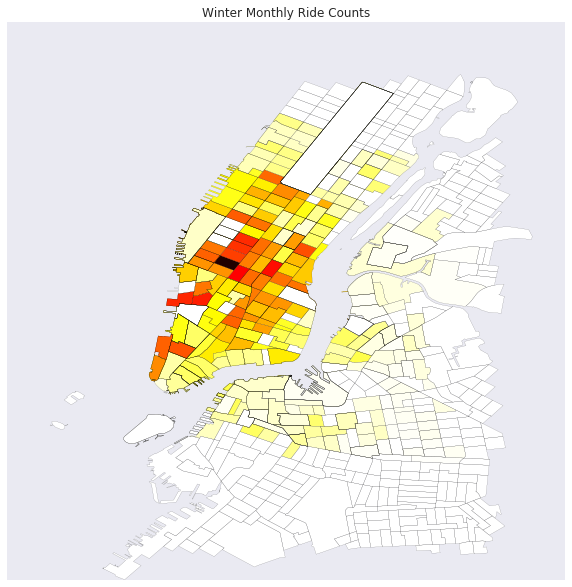

In [148]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='MonthlyAve_winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Winter Monthly Ride Counts")

### Export Shapefile CTs in the CitiBike Zone

In [149]:
path='ct_shape_MonthlyAve_Zoom.shp'
ct_shape_MonthlyAve_Zoom.to_file(path)

## Exploratory Geospatial Analysis

In [150]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [151]:
qW_CT=ps.queen_from_shapefile(path)

('Island id: ', [0])


#### Neighbors of index10

In [152]:
qW_CT[10]

{1: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [153]:
qW_CT.cardinalities[10]

9

#### Matrix of Weights

In [154]:
Wmatrix, ids = qW_CT.full()

In [155]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [156]:
qW_CT.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

#### Summer Observations

In [157]:
MonthlyRide=ct_shape_MonthlyAve_Zoom.MonthlyAve_summer
MonthlyRideLag=ps.lag_spatial(qW_CT, MonthlyRide)

#### Create Quantiles for maping

In [158]:
MonthlyRideLagQ10 = ps.Quantiles(MonthlyRideLag, k=10)
MonthlyRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    88.000                 2
   88.000 < x[i] <=  1511.625                78
 1511.625 < x[i] <=  3075.000                80
 3075.000 < x[i] <=  7551.400                81
 7551.400 < x[i] <= 11627.857                78
11627.857 < x[i] <= 25693.803                79
25693.803 < x[i] <= 37395.214                80
37395.214 < x[i] <= 43198.655                79
43198.655 < x[i] <= 66036.500                80

#### Map the SUMMER monthly rides lag

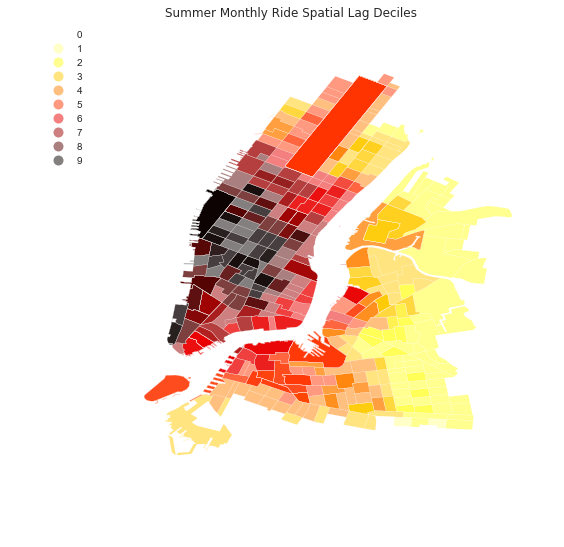

In [159]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Summer Monthly Ride Spatial Lag Deciles")


## Global  Spatial Autocorrelation - Summer

In [160]:
b,a = np.polyfit(MonthlyRide, MonthlyRideLag, 1)
b,a 

(0.64389314312589119, 5682.9310787418517)

### Moran Scatterplot - Summer

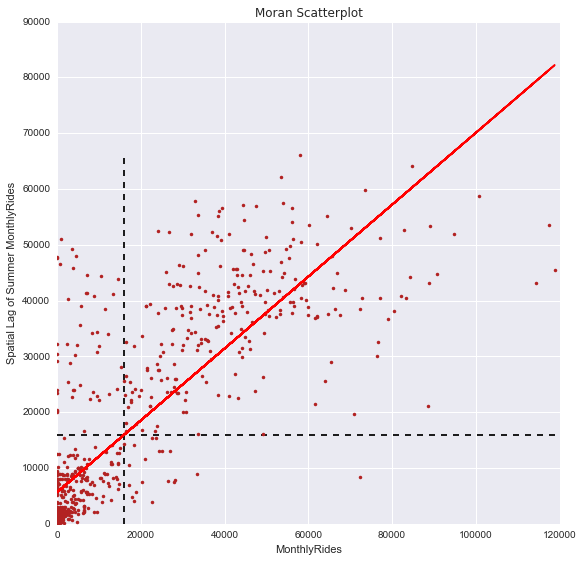

In [161]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide, MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Summer MonthlyRides')
plt.xlabel('MonthlyRides')

### Moran's I - Summer

In [162]:
I_MonthlyRide = ps.Moran(MonthlyRide, qW_CT)

In [163]:
I_MonthlyRide.I, I_MonthlyRide.p_sim

(0.6440694990680973, 0.001)

Thus, the $I$ statistic for summer is $0.644$ for this data, and has a very small $p$ value. 

In [164]:
I_MonthlyRide.sim[0:10]

array([-0.01439262, -0.00973507,  0.0081941 ,  0.00628476,  0.01196389,
       -0.01607814,  0.0304356 , -0.00508065,  0.02113326, -0.01339347])

### KDEplot of all of the simulated points - Summer
the vertical line shows the observed value

In [165]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

(-0.7, 0.7)

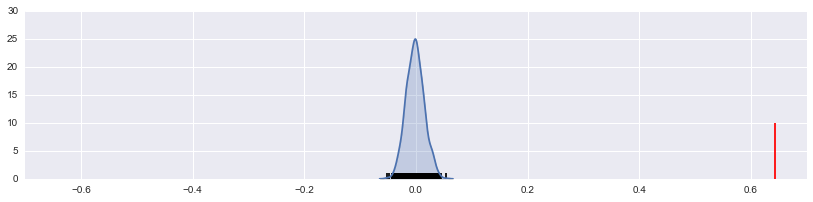

In [166]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

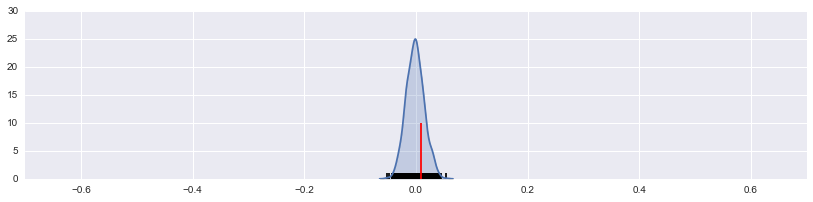

In [167]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

## Local  Spatial Autocorrelation - Summer

In [168]:
LMo_MonthlyRide = ps.Moran_Local(MonthlyRide, qW_CT,permutations=999)

In [169]:
LMo_MonthlyRide.Is[0:5], LMo_MonthlyRide.p_sim[0:5]

(array([-0.        , -0.23689404,  0.01179723,  0.00235718,  0.0247348 ]),
 array([ 0.001,  0.196,  0.354,  0.331,  0.365]))

### LISA (Local Indicators of Spatial Autocorrelation) - Summer

In [170]:
sigs = MonthlyRide[LMo_MonthlyRide.p_sim <= .001]
W_sigs = MonthlyRideLag[LMo_MonthlyRide.p_sim <= .001]
insigs = MonthlyRide[LMo_MonthlyRide.p_sim > .001]
W_insigs = MonthlyRideLag[LMo_MonthlyRide.p_sim > .001]

### Plot Signficant LISA - Summer

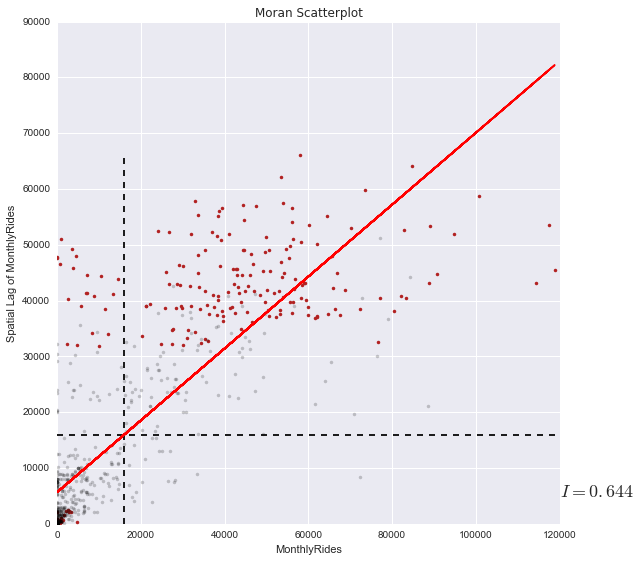

In [171]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')


### Hot and Cold spots - Summer

In [172]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig
print "Number of Summer Hotspots:", hotspots.sum()
print "Number of Summer Coldspots:", coldspots.sum()

Number of Summer Hotspots: 189
Number of Summer Coldspots: 244


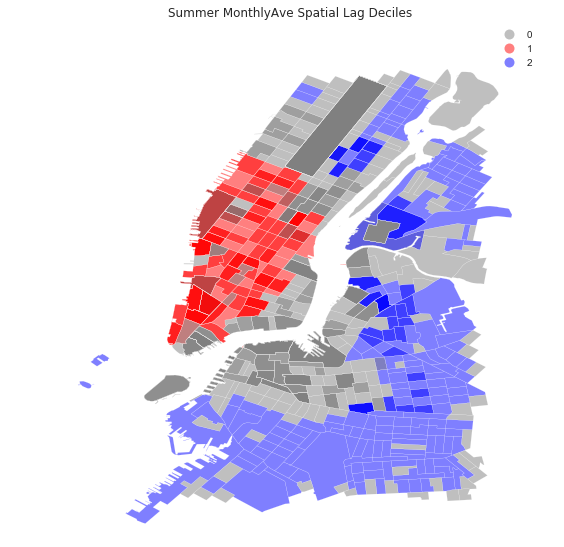

In [173]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Summer MonthlyAve Spatial Lag Deciles")

The plot above shows hot spots and cold spots for citibike ridership for summer months. One cold spot that I notice that is distinct from the winter months is the one on the upper east side. In the winter, this spot is gray and is not considered a cold spot. This means that these census tracts are spatially similar in the summer, with each census tract having low ridership. In the winter, these census tracts are not similar, and have a somewhat random distribution.

#### Winter Observations

In [174]:
MonthlyRide=ct_shape_MonthlyAve_Zoom.MonthlyAve_winter
MonthlyRideLag=ps.lag_spatial(qW_CT, MonthlyRide)

In [175]:
MonthlyRideLagQ10 = ps.Quantiles(MonthlyRideLag, k=10)
MonthlyRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    55.143                 2
   55.143 < x[i] <=   902.271                78
  902.271 < x[i] <=  2165.333                80
 2165.333 < x[i] <=  3452.913                79
 3452.913 < x[i] <=  5014.083                80
 5014.083 < x[i] <= 11249.113                79
11249.113 < x[i] <= 15205.882                80
15205.882 < x[i] <= 18477.420                79
18477.420 < x[i] <= 29902.786                80

#### Map the WINTER monthly rides lag

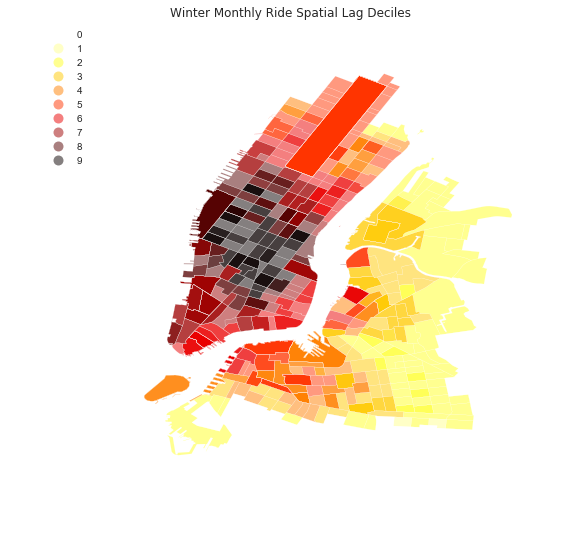

In [176]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Winter Monthly Ride Spatial Lag Deciles")

## Global  Spatial Autocorrelation - WINTER

In [177]:
b,a = np.polyfit(MonthlyRide, MonthlyRideLag, 1)
b,a 

(0.66189462250696818, 2331.8176412763351)

### Moran Scatterplot - Winter

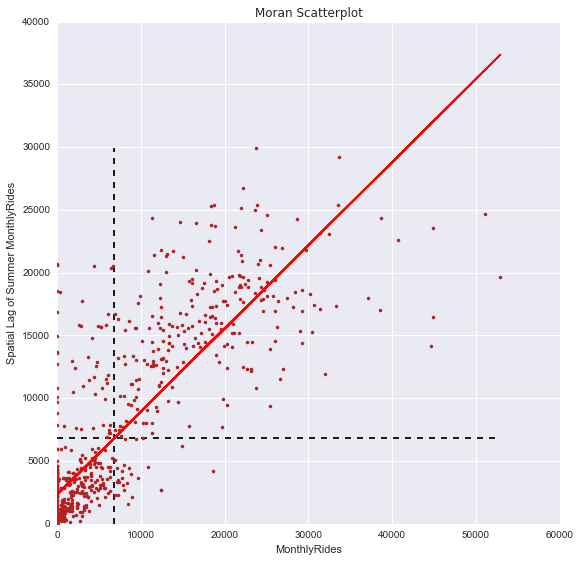

In [178]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide, MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Summer MonthlyRides')
plt.xlabel('MonthlyRides')

### Moran's I - Winter

In [179]:
I_MonthlyRide = ps.Moran(MonthlyRide, qW_CT)

In [180]:
I_MonthlyRide.I, I_MonthlyRide.p_sim

(0.66204419671059411, 0.001)

Thus, the $I$ statistic for winter is $0.662$ for this data, and has a very small $p$ value. 

In [181]:
I_MonthlyRide.sim[0:10]

array([ 0.00739773, -0.00110864, -0.01907797,  0.02044125, -0.04359529,
        0.01388171,  0.0077966 ,  0.00488259, -0.00885388,  0.00114249])

### KDEplot of all of the simulated points - Winter
the vertical line shows the observed value

In [182]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

(-0.7, 0.7)

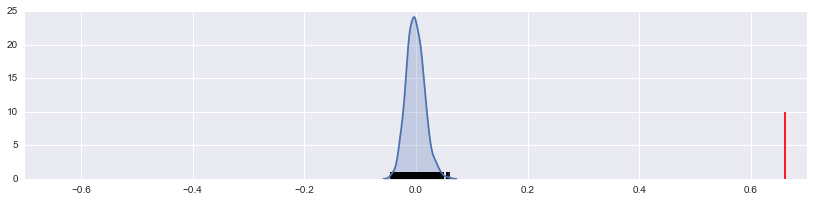

In [183]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

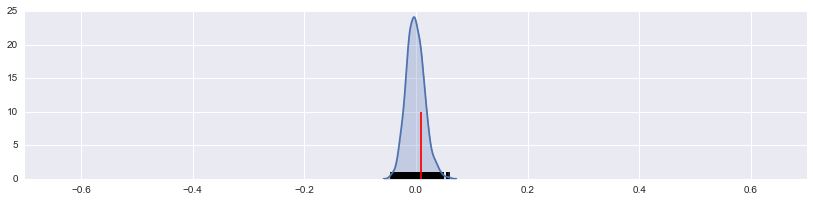

In [184]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

## Local  Spatial Autocorrelation - Winter

In [185]:
LMo_MonthlyRide = ps.Moran_Local(MonthlyRide, qW_CT,permutations=999)

In [186]:
LMo_MonthlyRide.Is[0:5], LMo_MonthlyRide.p_sim[0:5]

(array([-0.        , -0.3153042 , -0.00110645, -0.00100209, -0.06082761]),
 array([ 0.001,  0.146,  0.474,  0.483,  0.444]))

### LISA (Local Indicators of Spatial Autocorrelation) - Winter

In [187]:
sigs = MonthlyRide[LMo_MonthlyRide.p_sim <= .001]
W_sigs = MonthlyRideLag[LMo_MonthlyRide.p_sim <= .001]
insigs = MonthlyRide[LMo_MonthlyRide.p_sim > .001]
W_insigs = MonthlyRideLag[LMo_MonthlyRide.p_sim > .001]

### Plot Signficant LISA - Winter

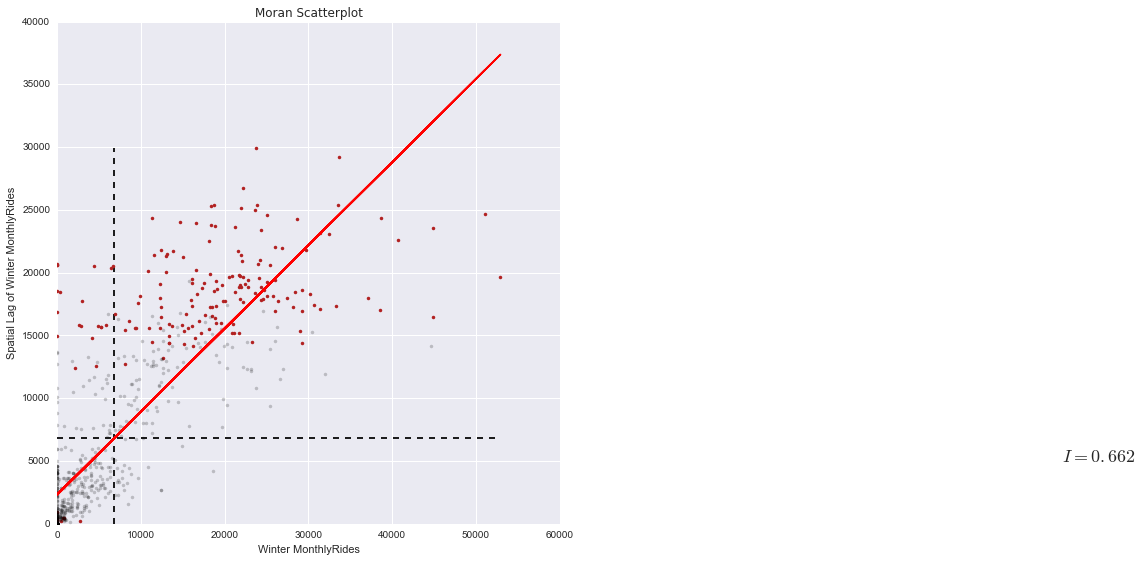

In [188]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Winter MonthlyRides')
plt.xlabel('Winter MonthlyRides')


### Hot and Cold spots - Winter

In [189]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig
print "Number of Winter Hotspots:", hotspots.sum()
print "Number of Winter Coldspots:", coldspots.sum()

Number of Winter Hotspots: 193
Number of Winter Coldspots: 210


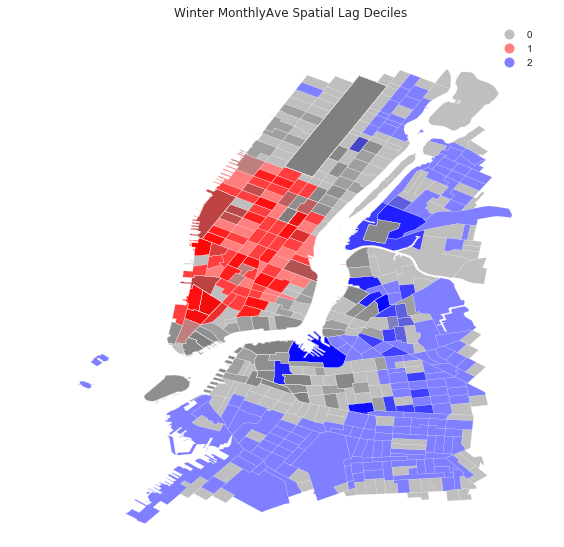

In [190]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Winter MonthlyAve Spatial Lag Deciles")

The plot above shows hot spots and cold spots for citibike ridership for winter months. The hot and cold spots are more closely clustered spatially compared to the summer, as you can see that census tracts along the periphery (such as along the shore) are less likely to be considered hot spots or cold spots.